In [128]:


import torch
import numpy as np
%load_ext autoreload
%autoreload 2
import pinot
import math
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [129]:
# define the target
f = lambda x: torch.sin(x)

x_tr = torch.tensor(np.concatenate(
    [
        np.linspace(-3 * math.pi, -math.pi, 50),
        np.linspace(math.pi, 3 * math.pi, 50)
    ]),
    dtype=torch.float32)[:, None]

x_te = torch.tensor(np.concatenate(
    [
        np.linspace(-7 * math.pi, -3 * math.pi, 100),
        np.linspace(-math.pi, math.pi, 50),
        np.linspace(3 * math.pi, 7 * math.pi, 100)
    ]),
    dtype=torch.float32)[:, None]

x = torch.tensor(np.linspace(-7 * math.pi, 7 * math.pi, 375),
                 dtype=torch.float32)[:, None]


y_tr = f(x_tr)
y_te = f(x_te)
y = f(x)

In [130]:
x.shape

torch.Size([375, 1])

In [113]:
base_kernel=pinot.inference.gp.kernels.rbf.RBF()

kernel = pinot.inference.gp.kernels.deep_kernel.DeepKernel(
    lambda x:x,
    base_kernel=base_kernel)

gpr = pinot.inference.gp.gpr.sparse_variational_gpr.SVGPR(
    kernel, 
    log_sigma=-5.0,
    n_inducing_points=100,
    initializer_std=0.1,
    in_features=50,
    kl_loss_scaling=0.0,
    grid_boundary=30)



In [114]:
gpr.kernel.representation(x).shape

torch.Size([375, 1])

In [115]:
opt = torch.optim.Adam(gpr.parameters(), 1e-3)
for _ in range(1000):
    opt.zero_grad()
    loss = gpr.loss(x_tr, y_tr).sum()
    loss.backward()
    print(loss)
    opt.step()

/Users/wangy1/Documents/GitHub/pinot/pinot/inference/gp/gpr/sparse_variational_gpr.py:70: UserWarning: torch.range is deprecated in favor of torch.arange and will be removed in 0.5. Note that arange generates values in [start; end), not [start; end].
  torch.range(0, self.y_tr_diag.shape[0]-1)[:, None],
/Users/wangy1/Documents/GitHub/pinot/pinot/inference/gp/gpr/sparse_variational_gpr.py:71: UserWarning: torch.range is deprecated in favor of torch.arange and will be removed in 0.5. Note that arange generates values in [start; end), not [start; end].
  torch.range(0, self.y_tr_diag.shape[0]-1)[None, :])


tensor(-581.3681, grad_fn=<SumBackward0>)
tensor(-590.4596, grad_fn=<SumBackward0>)
tensor(-599.5756, grad_fn=<SumBackward0>)
tensor(-608.6694, grad_fn=<SumBackward0>)
tensor(-617.7737, grad_fn=<SumBackward0>)
tensor(-626.8882, grad_fn=<SumBackward0>)
tensor(-635.9918, grad_fn=<SumBackward0>)
tensor(-645.1115, grad_fn=<SumBackward0>)
tensor(-654.2104, grad_fn=<SumBackward0>)
tensor(-663.3063, grad_fn=<SumBackward0>)
tensor(-672.4183, grad_fn=<SumBackward0>)
tensor(-681.5165, grad_fn=<SumBackward0>)
tensor(-690.6193, grad_fn=<SumBackward0>)
tensor(-699.7228, grad_fn=<SumBackward0>)
tensor(-708.8278, grad_fn=<SumBackward0>)
tensor(-717.9328, grad_fn=<SumBackward0>)
tensor(-727.0346, grad_fn=<SumBackward0>)
tensor(-736.1335, grad_fn=<SumBackward0>)
tensor(-745.2385, grad_fn=<SumBackward0>)
tensor(-754.3500, grad_fn=<SumBackward0>)
tensor(-763.4504, grad_fn=<SumBackward0>)
tensor(-772.5576, grad_fn=<SumBackward0>)
tensor(-781.6602, grad_fn=<SumBackward0>)
tensor(-790.7581, grad_fn=<SumBack

tensor(-2344.3499, grad_fn=<SumBackward0>)
tensor(-2353.4109, grad_fn=<SumBackward0>)
tensor(-2362.4805, grad_fn=<SumBackward0>)
tensor(-2371.5596, grad_fn=<SumBackward0>)
tensor(-2380.6194, grad_fn=<SumBackward0>)
tensor(-2389.6799, grad_fn=<SumBackward0>)
tensor(-2398.7480, grad_fn=<SumBackward0>)
tensor(-2407.8232, grad_fn=<SumBackward0>)
tensor(-2416.8691, grad_fn=<SumBackward0>)
tensor(-2425.9424, grad_fn=<SumBackward0>)
tensor(-2435.0081, grad_fn=<SumBackward0>)
tensor(-2444.0676, grad_fn=<SumBackward0>)
tensor(-2453.1360, grad_fn=<SumBackward0>)
tensor(-2462.1836, grad_fn=<SumBackward0>)
tensor(-2471.2480, grad_fn=<SumBackward0>)
tensor(-2480.3162, grad_fn=<SumBackward0>)
tensor(-2489.3813, grad_fn=<SumBackward0>)
tensor(-2498.4460, grad_fn=<SumBackward0>)
tensor(-2507.5127, grad_fn=<SumBackward0>)
tensor(-2516.5625, grad_fn=<SumBackward0>)
tensor(-2525.6301, grad_fn=<SumBackward0>)
tensor(-2534.6863, grad_fn=<SumBackward0>)
tensor(-2543.7446, grad_fn=<SumBackward0>)
tensor(-255

tensor(-4089.1074, grad_fn=<SumBackward0>)
tensor(-4098.1230, grad_fn=<SumBackward0>)
tensor(-4107.1313, grad_fn=<SumBackward0>)
tensor(-4116.1367, grad_fn=<SumBackward0>)
tensor(-4125.1528, grad_fn=<SumBackward0>)
tensor(-4134.1685, grad_fn=<SumBackward0>)
tensor(-4143.1724, grad_fn=<SumBackward0>)
tensor(-4152.1958, grad_fn=<SumBackward0>)
tensor(-4161.1997, grad_fn=<SumBackward0>)
tensor(-4170.1982, grad_fn=<SumBackward0>)
tensor(-4179.1938, grad_fn=<SumBackward0>)
tensor(-4188.2168, grad_fn=<SumBackward0>)
tensor(-4197.2305, grad_fn=<SumBackward0>)
tensor(-4206.2344, grad_fn=<SumBackward0>)
tensor(-4215.2578, grad_fn=<SumBackward0>)
tensor(-4224.2622, grad_fn=<SumBackward0>)
tensor(-4233.2642, grad_fn=<SumBackward0>)
tensor(-4242.2554, grad_fn=<SumBackward0>)
tensor(-4251.2754, grad_fn=<SumBackward0>)
tensor(-4260.2778, grad_fn=<SumBackward0>)
tensor(-4269.2837, grad_fn=<SumBackward0>)
tensor(-4278.2915, grad_fn=<SumBackward0>)
tensor(-4287.3228, grad_fn=<SumBackward0>)
tensor(-429

tensor(-5822.1924, grad_fn=<SumBackward0>)
tensor(-5831.1587, grad_fn=<SumBackward0>)
tensor(-5840.0815, grad_fn=<SumBackward0>)
tensor(-5849.0347, grad_fn=<SumBackward0>)
tensor(-5858.0073, grad_fn=<SumBackward0>)
tensor(-5866.9272, grad_fn=<SumBackward0>)
tensor(-5875.8579, grad_fn=<SumBackward0>)
tensor(-5884.8076, grad_fn=<SumBackward0>)
tensor(-5893.7529, grad_fn=<SumBackward0>)
tensor(-5902.7075, grad_fn=<SumBackward0>)
tensor(-5911.6108, grad_fn=<SumBackward0>)
tensor(-5920.5957, grad_fn=<SumBackward0>)
tensor(-5929.4946, grad_fn=<SumBackward0>)
tensor(-5938.4487, grad_fn=<SumBackward0>)
tensor(-5947.4019, grad_fn=<SumBackward0>)
tensor(-5956.3296, grad_fn=<SumBackward0>)
tensor(-5965.2681, grad_fn=<SumBackward0>)
tensor(-5974.2261, grad_fn=<SumBackward0>)
tensor(-5983.1616, grad_fn=<SumBackward0>)
tensor(-5992.1055, grad_fn=<SumBackward0>)
tensor(-6001.0391, grad_fn=<SumBackward0>)
tensor(-6009.9761, grad_fn=<SumBackward0>)
tensor(-6018.9053, grad_fn=<SumBackward0>)
tensor(-602

tensor(-7523.6050, grad_fn=<SumBackward0>)
tensor(-7532.4648, grad_fn=<SumBackward0>)
tensor(-7541.3379, grad_fn=<SumBackward0>)
tensor(-7550.2085, grad_fn=<SumBackward0>)
tensor(-7559.0698, grad_fn=<SumBackward0>)
tensor(-7567.9185, grad_fn=<SumBackward0>)
tensor(-7576.8105, grad_fn=<SumBackward0>)
tensor(-7585.6660, grad_fn=<SumBackward0>)
tensor(-7594.5244, grad_fn=<SumBackward0>)
tensor(-7603.3872, grad_fn=<SumBackward0>)
tensor(-7612.2759, grad_fn=<SumBackward0>)
tensor(-7621.1211, grad_fn=<SumBackward0>)
tensor(-7629.9849, grad_fn=<SumBackward0>)
tensor(-7638.8540, grad_fn=<SumBackward0>)
tensor(-7647.7153, grad_fn=<SumBackward0>)
tensor(-7656.5781, grad_fn=<SumBackward0>)
tensor(-7665.4268, grad_fn=<SumBackward0>)
tensor(-7674.2969, grad_fn=<SumBackward0>)
tensor(-7683.1523, grad_fn=<SumBackward0>)
tensor(-7692.0088, grad_fn=<SumBackward0>)
tensor(-7700.8774, grad_fn=<SumBackward0>)
tensor(-7709.7407, grad_fn=<SumBackward0>)
tensor(-7718.5923, grad_fn=<SumBackward0>)
tensor(-772

tensor(-9209.1943, grad_fn=<SumBackward0>)
tensor(-9217.9785, grad_fn=<SumBackward0>)
tensor(-9226.7393, grad_fn=<SumBackward0>)
tensor(-9235.5400, grad_fn=<SumBackward0>)
tensor(-9244.3174, grad_fn=<SumBackward0>)
tensor(-9253.0801, grad_fn=<SumBackward0>)
tensor(-9261.8682, grad_fn=<SumBackward0>)
tensor(-9270.6357, grad_fn=<SumBackward0>)
tensor(-9279.4219, grad_fn=<SumBackward0>)
tensor(-9288.1953, grad_fn=<SumBackward0>)
tensor(-9296.9688, grad_fn=<SumBackward0>)
tensor(-9305.7471, grad_fn=<SumBackward0>)
tensor(-9314.5088, grad_fn=<SumBackward0>)
tensor(-9323.2852, grad_fn=<SumBackward0>)
tensor(-9332.0479, grad_fn=<SumBackward0>)
tensor(-9340.8203, grad_fn=<SumBackward0>)
tensor(-9349.6172, grad_fn=<SumBackward0>)
tensor(-9358.3848, grad_fn=<SumBackward0>)
tensor(-9367.1416, grad_fn=<SumBackward0>)
tensor(-9375.9336, grad_fn=<SumBackward0>)
tensor(-9384.6904, grad_fn=<SumBackward0>)
tensor(-9393.4678, grad_fn=<SumBackward0>)
tensor(-9402.2500, grad_fn=<SumBackward0>)
tensor(-941

In [122]:
gpr.condition(x)

/Users/wangy1/Documents/GitHub/pinot/pinot/inference/gp/gpr/sparse_variational_gpr.py:70: UserWarning: torch.range is deprecated in favor of torch.arange and will be removed in 0.5. Note that arange generates values in [start; end), not [start; end].
  torch.range(0, self.y_tr_diag.shape[0]-1)[:, None],
/Users/wangy1/Documents/GitHub/pinot/pinot/inference/gp/gpr/sparse_variational_gpr.py:71: UserWarning: torch.range is deprecated in favor of torch.arange and will be removed in 0.5. Note that arange generates values in [start; end), not [start; end].
  torch.range(0, self.y_tr_diag.shape[0]-1)[None, :])


MultivariateNormal(loc: torch.Size([375]), covariance_matrix: torch.Size([375, 375]))

In [123]:
y_hat_distribution = gpr.condition(x)


In [124]:
y_hat_distribution.sample()

tensor([ 5.0325e-01,  7.5392e-01,  5.2310e-01,  3.2741e-01,  5.9221e-01,
         7.1432e-01,  7.5755e-01,  6.8427e-01,  8.3530e-01,  6.6384e-01,
         6.8123e-01,  7.8971e-01,  5.5655e-01,  8.8786e-01,  6.3067e-01,
         6.6261e-01,  6.3212e-01,  5.4241e-01,  4.0153e-01,  2.4965e-01,
         2.0170e-01,  4.0060e-01,  3.4189e-01,  5.4119e-01,  7.3064e-01,
         5.0589e-01,  4.8423e-01,  4.7036e-01,  3.9461e-01,  4.5209e-01,
         4.9920e-01,  4.9460e-01,  5.8302e-01,  5.8446e-01,  4.1217e-01,
         4.6154e-01,  3.9298e-01,  3.3108e-01,  3.2888e-01,  1.7108e-01,
         2.9733e-01,  1.5261e-01,  3.1067e-01,  4.1815e-02, -2.2492e-01,
        -3.2841e-01, -1.2988e-01,  2.8416e-02,  9.3699e-02,  1.4045e-01,
         6.7072e-03,  2.1552e-01,  1.2026e-01,  1.8750e-02,  3.5869e-02,
        -3.3895e-02,  1.0861e-01,  3.4499e-01,  1.1443e-02, -3.1249e-02,
         1.2947e-01,  1.5116e-03, -1.3041e-01, -2.7510e-01, -2.3751e-01,
        -1.6984e-01, -2.5158e-01, -3.4262e-01, -4.3

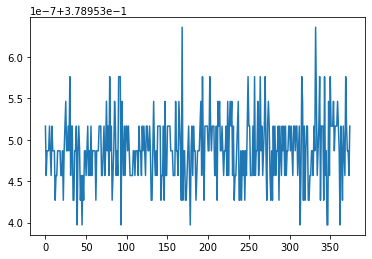

In [125]:
from matplotlib import pyplot as plt
plt.plot(y_hat_distribution.variance.detach())

In [126]:
def plot():
    from pinot.inference.utils import confidence_interval
    from matplotlib import pyplot as plt

    plt.figure(figsize=(10, 6))
    # y_hat_distribution = pinot.inference.utils.condition_mixture(net, x, sampler=opt, n_samples=1000)

    nll = y_hat_distribution.log_prob(y).mean() / float(y.shape[0])

    plt.plot(x.flatten(), y_hat_distribution.mean.detach().numpy().flatten(), c='k', linewidth=5)

    low, high = confidence_interval(y_hat_distribution, 0.95, n_samples=10)
    plt.fill_between(x.flatten(), low.flatten().detach(), high.flatten().detach(), color='k', alpha=0.1)
    
    low, high = confidence_interval(y_hat_distribution, 0.75, n_samples=10)
    plt.fill_between(x.flatten(), low.flatten().detach(), high.flatten().detach(), color='k', alpha=0.2)

    low, high = confidence_interval(y_hat_distribution, 0.50, n_samples=10)
    plt.fill_between(x.flatten(), low.flatten().detach(), high.flatten().detach(), color='k', alpha=0.3)

    low, high = confidence_interval(y_hat_distribution, 0.25, n_samples=10)
    plt.fill_between(x.flatten(), low.flatten().detach(), high.flatten().detach(), color='k', alpha=0.4)

    plt.scatter(x_te, y_te, label='te')
    plt.scatter(x_tr, y_tr, label='tr')
    plt.legend()
    plt.ylim(-2, 2)
    plt.title('NLL=%s' % nll.detach().numpy().round(3))

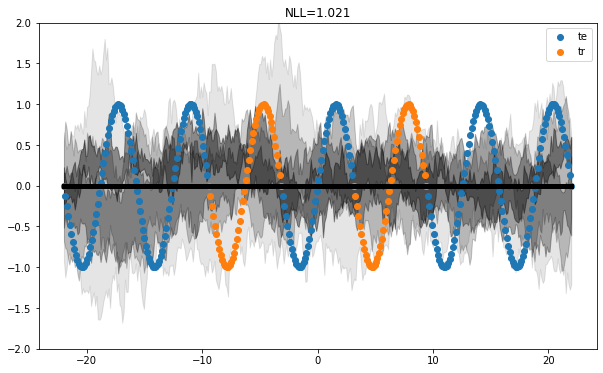

In [127]:
plot()